### Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
from dython.nominal import associations
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
import warnings
import pickle
from sklearn.dummy import DummyClassifier
from collections import Counter
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import TweedieRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import multiprocessing
import lightgbm as lgbm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA


from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [2]:
#with open('train.pickle', 'wb') as f:
    #pickle.dump([X_train, y_train, X_test, y_test], f)

In [3]:
with open('train_scaled.pickle', 'rb') as f:
    X_train_scaled, y_train, X_test_scaled, y_test = pickle.load(f)

In [4]:
X_train_scaled

,V_YEAR,C_YEAR,P_AGE,C_WTHR_2,C_WTHR_3,C_WTHR_4,C_WTHR_5,C_WTHR_6,C_WTHR_7,C_WTHR_52,C_WTHR_55,C_RSUR_2,C_RSUR_3,C_RSUR_4,C_RSUR_5,C_RSUR_6,C_RSUR_7,C_RSUR_8,C_RSUR_9,C_RSUR_52,C_RSUR_55,C_RALN_2,C_RALN_3,C_RALN_4,C_RALN_5,C_RALN_6,C_RALN_52,C_RALN_55,P_SEX_1,P_SEX_8,P_SEX_9,P_SAFE_2,P_SAFE_9,P_SAFE_10,P_SAFE_11,P_SAFE_12,P_SAFE_13,P_SAFE_50,P_SAFE_54,P_SAFE_56,C_WDAY_2,C_WDAY_3,C_WDAY_4,C_WDAY_5,C_WDAY_6,C_WDAY_7,C_WDAY_52,C_MNTH,V_TYPE,C_HOUR,C_RCFG,C_TRAF
0,-0.288652,-1.550662,0.248333,-0.318667,-0.306730,-0.241327,-0.064518,-0.120606,-0.045583,-0.107651,-0.043321,-0.434290,-0.20577,-0.101427,-0.228106,-0.056196,-0.026217,-0.013255,-0.005599,-0.102849,-0.157983,-0.309473,-0.259504,-0.195785,-0.072013,-0.062903,-0.245216,-0.066423,-0.653743,-0.183724,-0.018268,0.711388,-0.145371,-0.003494,-0.000692,-0.05216,-0.087701,-0.33065,-0.320027,-0.086715,-0.382317,-0.383455,2.505264,-0.429499,-0.381161,-0.337169,-0.013192,-0.787702,0.396973,0.649603,-0.318442,-1.099629
1,-0.947703,-0.435167,0.427130,-0.318667,-0.306730,-0.241327,-0.064518,-0.120606,-0.045583,-0.107651,-0.043321,-0.434290,-0.20577,-0.101427,-0.228106,-0.056196,-0.026217,-0.013255,-0.005599,-0.102849,-0.157983,-0.309473,-0.259504,-0.195785,-0.072013,-0.062903,-0.245216,-0.066423,-0.653743,-0.183724,-0.018268,-1.405702,-0.145371,-0.003494,-0.000692,-0.05216,-0.087701,3.02435,-0.320027,-0.086715,-0.382317,-0.383455,-0.399160,-0.429499,2.623564,-0.337169,-0.013192,0.672396,6.777418,-0.870906,-0.318442,-1.099629
2,-0.581564,-0.881365,-1.003243,-0.318667,-0.306730,4.143750,-0.064518,-0.120606,-0.045583,-0.107651,-0.043321,-0.434290,-0.20577,-0.101427,-0.228106,-0.056196,-0.026217,-0.013255,-0.005599,9.723004,-0.157983,-0.309473,-0.259504,-0.195785,-0.072013,-0.062903,-0.245216,-0.066423,-0.653743,-0.183724,-0.018268,0.711388,-0.145371,-0.003494,-0.000692,-0.05216,-0.087701,-0.33065,-0.320027,-0.086715,-0.382317,-0.383455,-0.399160,-0.429499,-0.381161,2.965876,-0.013192,-1.663761,-0.328077,0.801654,-0.383581,-0.927998
3,-0.508336,-1.104464,-0.001982,-0.318667,-0.306730,-0.241327,-0.064518,-0.120606,-0.045583,-0.107651,-0.043321,-0.434290,-0.20577,-0.101427,-0.228106,-0.056196,-0.026217,-0.013255,-0.005599,-0.102849,-0.157983,-0.309473,-0.259504,-0.195785,-0.072013,-0.062903,-0.245216,-0.066423,1.529652,-0.183724,-0.018268,0.711388,-0.145371,-0.003494,-0.000692,-0.05216,-0.087701,-0.33065,-0.320027,-0.086715,2.615632,-0.383455,-0.399160,-0.429499,-0.381161,-0.337169,-0.013192,-0.495682,-0.328077,0.041399,-0.383581,-1.099629
4,-0.288652,1.572725,-1.003243,3.138075,-0.306730,-0.241327,-0.064518,-0.120606,-0.045583,-0.107651,-0.043321,2.302608,-0.20577,-0.101427,-0.228106,-0.056196,-0.026217,-0.013255,-0.005599,-0.102849,-0.157983,-0.309473,-0.259504,-0.195785,-0.072013,-0.062903,-0.245216,-0.066423,1.529652,-0.183724,-0.018268,-1.405702,-0.145371,-0.003494,-0.000692,-0.05216,-0.087701,-0.33065,3.124738,-0.086715,-0.382317,2.607871,-0.399160,-0.429499,-0.381161,-0.337169,-0.013192,1.548455,-0.328077,-0.110652,-0.383581,-1.099629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178393,-1.086169,-1.542547,-0.928473,-0.318667,-0.306730,-0.241327,-0.064518,-0.120606,-0.045583,-0.107651,-0.043321,-0.434290,-0.20577,-0.101427,-0.228106,-0.056196,-0.026217,-0.013255,-0.005599,-0.102849,-0.157983,-0.309473,-0.259504,-0.195785,-0.072013,-0.062903,-0.245216,-0.066423,-0.653743,-0.183724,-0.018268,0.711388,-0.145371,-0.003494,-0.000692,-0.05216,-0.087701,-0.33065,-0.320027,-0.086715,-0.382317,-0.383455,-0.399160,-0.429499,-0.381161,2.965876,-0.013192,0.088357,-0.328077,1.409857,-0.383581,0.359235
4178394,-0.187344,-0.195054,-0.708833,-0.318667,-0.306730,-0.241327,-0.064518,-0.120606,-0.045583,-0.107651,-0.043321,-0.434290,-0.20577,-0.101427,-0.228106,-0.056196,-0.026217,-0.013255,-0.005599,-0.102849,-0.157983,-0.309473,-0.259504

### Reducción de la dimensionalidad
Tenemos problemas para la ejecución de algunos modelos debido al tamaño del dataset. Como ejemplo, nuestro ordenador no es capaz de ejecutar un RandomForestClassier y por lo tanto procederemos a reducir la dimensionalidad de nuestras variables:

### Regularización Ridge

In [5]:
sel_ridge = SelectFromModel(LogisticRegression(C=1, penalty='l2'), threshold = 0.009)
sel_ridge.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(C=1), threshold=0.009)

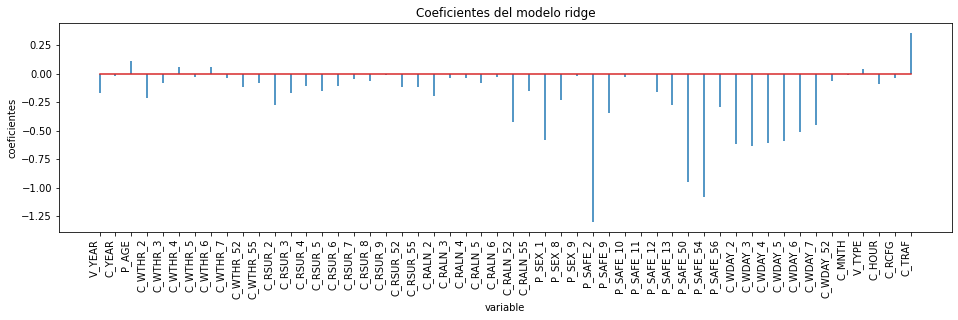

In [6]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train_scaled.columns,
                         'coef': sel_ridge.estimator_.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo ridge');

In [7]:
sel_ridge.get_support()
selected_feat = X_train_scaled.columns[sel_ridge.get_support()]
selected_feat

Index(['V_YEAR', 'C_YEAR', 'P_AGE', 'C_WTHR_2', 'C_WTHR_3', 'C_WTHR_4',
       'C_WTHR_5', 'C_WTHR_6', 'C_WTHR_7', 'C_WTHR_52', 'C_WTHR_55',
       'C_RSUR_2', 'C_RSUR_3', 'C_RSUR_4', 'C_RSUR_5', 'C_RSUR_6', 'C_RSUR_7',
       'C_RSUR_8', 'C_RSUR_9', 'C_RSUR_52', 'C_RSUR_55', 'C_RALN_2',
       'C_RALN_3', 'C_RALN_4', 'C_RALN_5', 'C_RALN_6', 'C_RALN_52',
       'C_RALN_55', 'P_SEX_1', 'P_SEX_8', 'P_SEX_9', 'P_SAFE_2', 'P_SAFE_9',
       'P_SAFE_10', 'P_SAFE_12', 'P_SAFE_13', 'P_SAFE_50', 'P_SAFE_54',
       'P_SAFE_56', 'C_WDAY_2', 'C_WDAY_3', 'C_WDAY_4', 'C_WDAY_5', 'C_WDAY_6',
       'C_WDAY_7', 'C_WDAY_52', 'C_MNTH', 'V_TYPE', 'C_HOUR', 'C_RCFG',
       'C_TRAF'],
      dtype='object')

In [8]:
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 52
selected features: 51


### PCA

In [9]:
pca = PCA()#primero lo hago sin fijar el número de componentes para visualizar la varianza

pca.fit(X_train_scaled[selected_feat])
X_train_pca = pca.transform(X_train_scaled[selected_feat])
X_test_pca = pca.transform(X_test_scaled[selected_feat])

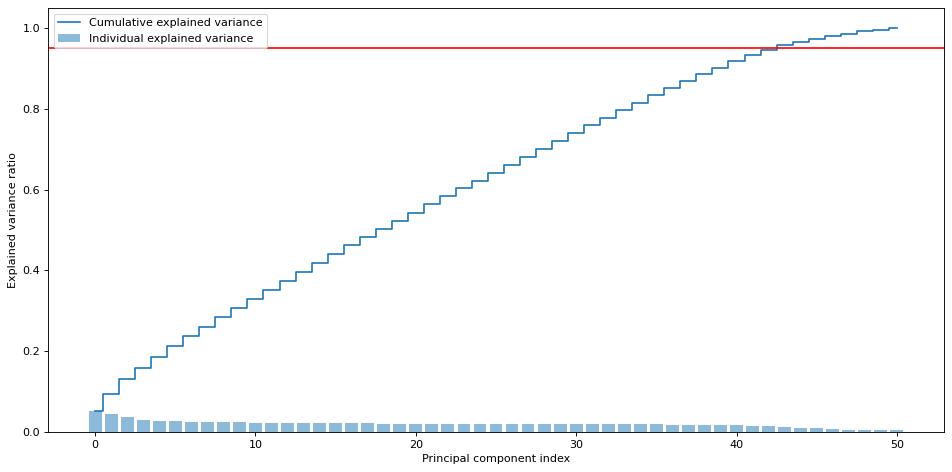

In [10]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

threshold = 0.95
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=threshold, color='r', linestyle='-')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Selecciono los 27 primeras componentes

In [11]:
pca = PCA(n_components=27)

pca.fit(X_train_scaled[selected_feat])
X_train_pca = pca.transform(X_train_scaled[selected_feat])
X_test_pca = pca.transform(X_test_scaled[selected_feat])

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

threshold = 0.90
plt.figure(figsize=(12, 6), dpi=80)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.axhline(y=threshold, color='r', linestyle='-')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)
X_train_pca.columns = ['PCA_'+str(i) for i in X_train_pca.columns]
X_test_pca.columns = ['PCA_'+str(i) for i in X_test_pca.columns]
X_train_pca.head()

In [ ]:
with open('train_pca.pickle', 'wb') as f:
    pickle.dump([X_train_pca, y_train, X_test_pca, y_test], f)

In [12]:
with open('train_pca.pickle', 'rb') as f:
    X_train_pca, y_train, X_test_pca, y_test = pickle.load(f)

### Modelos

In [13]:
def print_binary_evaluation(y_true, y_pred):
    results_dict = {'accuracy': accuracy_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'f1_score': f1_score(y_true, y_pred)}
    return results_dict

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, max_depth=2)
rfc.fit(X_train_pca, y_train)
print(rfc)
print("model score: %.3f" % rfc.score(X_test_pca, y_test))
y_pred = rfc.predict(X_test_pca)
print_binary_evaluation(y_test, y_pred)

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, max_depth=5)
rfc.fit(X_train_pca, y_train)
print(rfc)
print("model score: %.3f" % rfc.score(X_test_pca, y_test))
y_pred = rfc.predict(X_test_pca)
print_binary_evaluation(y_test, y_pred)

In [ ]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_pca, y_train)
print(rfc)
print("model score: %.3f" % rfc.score(X_test_pca, y_test))
y_pred = rfc.predict(X_test_pca)
print_binary_evaluation(y_test, y_pred)

In [ ]:
dmc = DummyClassifier(strategy='constant', constant =1)
dmc.fit(X_train_pca, y_train)
print(dmc)
print("model score: %.3f" % dmc.score(X_test_pca, y_test))
y_pred = dmc.predict(X_test_pca)
print_binary_evaluation(y_test, y_pred)

In [ ]:
dmc = DummyClassifier(strategy='constant', constant =1)
dmc.fit(X_train_scaled, y_train)
print(dmc)
print("model score: %.3f" % dmc.score(X_test_scaled, y_test))
y_pred = dmc.predict(X_test_scaled)
print_binary_evaluation(y_test, y_pred)

In [ ]:
classifiers = [
    DummyClassifier(strategy='constant', constant =1),
    Lasso(),
    LogisticRegression()
]

In [ ]:
for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)]) 
    pipe.fit(X_train_pca, y_train)
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test_pca, y_test))
    y_pred = pipe.predict(X_test_pca)
    print_binary_evaluation(y_test, y_pred)


In [16]:
lgr = LogisticRegression() 
lgr.fit(X_train_pca, y_train)
print(lgr)
print("model score: %.3f" % lgr.score(X_test_pca, y_test))
y_pred = lgr.predict(X_test_pca)
print_binary_evaluation(y_test, y_pred)


LogisticRegression()
model score: 0.933


{'accuracy': 0.9334083018983264,
 'recall': 0.13663781799108313,
 'precision': 0.03554211388029834,
 'f1_score': 0.05641071911937201}

array([0, 0])

In [ ]:
lgr = LogisticRegression() 
lgr.fit(X_train_scaled, y_train)
print(lgr)
print("model score: %.3f" % lgr.score(X_test_scaled, y_test))
y_pred = lgr.predict(X_test_scaled)
print_binary_evaluation(y_test, y_pred)


In [ ]:
"""classifiers = [
    DummyClassifier(strategy='constant', constant =1),
    Lasso(),
    LogisticRegression(), 
    RandomForestClassifier(),
    xgb.XGBClassifier(),
    lgbm.LGBMClassifier(),
    GaussianNB(),
]"""

In [ ]:
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train_pca, y_train)
print(xgbc)
print("model score: %.3f" % xgbc.score(X_test_pca, y_test))
y_pred = xgbc.predict(X_test_pca)
print_binary_evaluation(y_test, y_pred)

In [ ]:
xgbc2 = xgb.XGBClassifier()
xgbc2.fit(X_train_scaled, y_train)
print(xgbc2)
print("model score: %.3f" % xgbc2.score(X_test_scaled, y_test))
y_pred = xgbc2.predict(X_test_scaled)
print_binary_evaluation(y_test, y_pred)

In [18]:
import lightgbm as lgb
lgbc = lgb.LGBMClassifier()
lgbc.fit(X_train_pca, y_train)
print(lgbc)
print("model score: %.3f" % lgbc.score(X_test_pca, y_test))
y_pred = lgbc.predict(X_test_pca)
print_binary_evaluation(y_test, y_pred)

LGBMClassifier()
model score: 0.939


{'accuracy': 0.9385355404486397,
 'recall': 0.17221785121077018,
 'precision': 0.04832695515651065,
 'f1_score': 0.07547458958297418}

In [35]:
# Create a training and testing dataset
train_set = lgb.Dataset(data = X_train_pca, label = y_train)
test_set = lgb.Dataset(data = X_test_pca, label = y_test)

In [23]:
N_FOLDS = 5
MAX_EVALS = 5

# Get default hyperparameters
model = lgb.LGBMClassifier()
default_params = model.get_params()

# Remove the number of estimators because we set this to 10000 in the cv call
del default_params['n_estimators']

# Cross validation with early stopping
cv_results = lgb.cv(default_params, train_set, num_boost_round = 10000, early_stopping_rounds = 100, 
                    metrics = 'auc', nfold = N_FOLDS, seed = 42)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.325333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 3342718, number of used features: 27
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was

In [24]:
from sklearn.metrics import roc_auc_score
# Optimal number of esimators found in cv
model.n_estimators = len(cv_results['auc-mean'])

# Train and make predicions with model
model.fit(X_train_pca, y_train)
preds = model.predict_proba(X_test_pca)[:, 1]
baseline_auc = roc_auc_score(y_test, preds)

print('The baseline model scores {:.5f} ROC AUC on the test set.'.format(baseline_auc))

The baseline model scores 0.67591 ROC AUC on the test set.


In [36]:
def objective(hyperparameters, iteration):
    """Objective function for grid and random search. Returns
       the cross validation score from a set of hyperparameters."""
    
    # Number of estimators will be found using early stopping
    if 'n_estimators' in hyperparameters.keys():
        del hyperparameters['n_estimators']
    
     # Perform n_folds cross validation
    cv_results = lgb.cv(hyperparameters, train_set, num_boost_round = 10000, nfold = N_FOLDS, 
                        early_stopping_rounds = 100, metrics = 'auc', seed = 42)
    
    # results to retun
    score = cv_results['auc-mean'][-1]
    estimators = len(cv_results['auc-mean'])
    hyperparameters['n_estimators'] = estimators 
    
    return [score, hyperparameters, iteration]


In [26]:
score, params, iteration = objective(default_params, 1)

print('The cross-validation ROC AUC was {:.5f}.'.format(score))

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.334176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 3342718, number of used features: 27
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: i

In [27]:
# Create a default model
model = lgb.LGBMModel()
model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [28]:
# Hyperparameter grid
param_grid = {
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(20, 150)),
    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}

In [29]:
import random

random.seed(50)

# Randomly sample a boosting type
boosting_type = random.sample(param_grid['boosting_type'], 1)[0]

# Set subsample depending on boosting type
subsample = 1.0 if boosting_type == 'goss' else random.sample(param_grid['subsample'], 1)[0]

print('Boosting type: ', boosting_type)
print('Subsample ratio: ', subsample)

Boosting type:  goss
Subsample ratio:  1.0


In [31]:
import itertools

def grid_search(param_grid, max_evals = MAX_EVALS):
    """Grid search algorithm (with limit on max evals)"""
    
    # Dataframe to store results
    results = pd.DataFrame(columns = ['score', 'params', 'iteration'],
                              index = list(range(MAX_EVALS)))
    
    # https://codereview.stackexchange.com/questions/171173/list-all-possible-permutations-from-a-python-dictionary-of-lists
    keys, values = zip(*param_grid.items())
    
    i = 0
    
    # Iterate through every possible combination of hyperparameters
    for v in itertools.product(*values):
        
        # Create a hyperparameter dictionary
        hyperparameters = dict(zip(keys, v))
        
        # Set the subsample ratio accounting for boosting type
        hyperparameters['subsample'] = 1.0 if hyperparameters['boosting_type'] == 'goss' else hyperparameters['subsample']
        
        # Evalute the hyperparameters
        eval_results = objective(hyperparameters, i)
        
        results.loc[i, :] = eval_results
        
        i += 1
        
        # Normally would not limit iterations
        if i > MAX_EVALS:
            break
       
    # Sort with best score on top
    results.sort_values('score', ascending = False, inplace = True)
    results.reset_index(inplace = True)
    
    return results   

In [37]:
grid_results = grid_search(param_grid)

print('The best validation score was {:.5f}'.format(grid_results.loc[0, 'score']))
print('\nThe best hyperparameters were:')

import pprint
pprint.pprint(grid_results.loc[0, 'params'])

TypeError: cv() got an unexpected keyword argument 'max_bin'

In [33]:
# Get the best parameters
grid_search_params = grid_results.loc[0, 'params']

# Create, train, test model
model = lgb.LGBMClassifier(**grid_search_params, random_state=42)
model.fit(train_features, train_labels)

preds = model.predict_proba(test_features)[:, 1]

print('The best model from grid search scores {:.5f} ROC AUC on the test set.'.format(roc_auc_score(test_labels, preds)))

NameError: name 'grid_results' is not defined

In [30]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_pca, y_train)
print(rfc)
print("model score: %.3f" % rfc.score(X_test_pca, y_test))
y_pred = rfc.predict(X_test_pca)
print_binary_evaluation(y_test, y_pred)

RandomForestClassifier()
model score: 0.942


{'accuracy': 0.9416149400548638,
 'recall': 0.15621994929626715,
 'precision': 0.04705107951553449,
 'f1_score': 0.07232036261356968}

In [ ]:
import lightgbm as lgb
lgbc2 = lgb.LGBMClassifier()
lgbc2.fit(X_train_scaled, y_train)
print(lgbc2)
print("model score: %.3f" % lgbc2.score(X_test_scaled, y_test))
y_pred = lgbc2.predict(X_test_scaled)
print_binary_evaluation(y_test, y_pred)

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
print(gnb)
print("model score: %.3f" % gnb.score(X_test_pca, y_test))
y_pred = gnb.predict(X_test_pca)
print_binary_evaluation(y_test, y_pred)

In [ ]:
gnb2 = GaussianNB()
gnb2.fit(X_train_scaled, y_train)
print(gnb2)
print("model score: %.3f" % gnb2.score(X_test_scaled, y_test))
y_pred = gnb2.predict(X_test_scaled)
print_binary_evaluation(y_test, y_pred)